# Kernel PCA

- kernel PCA gets its name from the use of a kernel function

- vanilla kernel PCA: just eigendecompose affinity matrix without doing other things

- advanced variants: Laplacian Eigenmaps, **diffusion maps**

# algo of vanilla kernel PCA

steps:

1. compute distance matrix $D$


2. compute affinity matrix $W$


3. eigendecompose affinity matrix $W=U\Lambda U^{-1}$


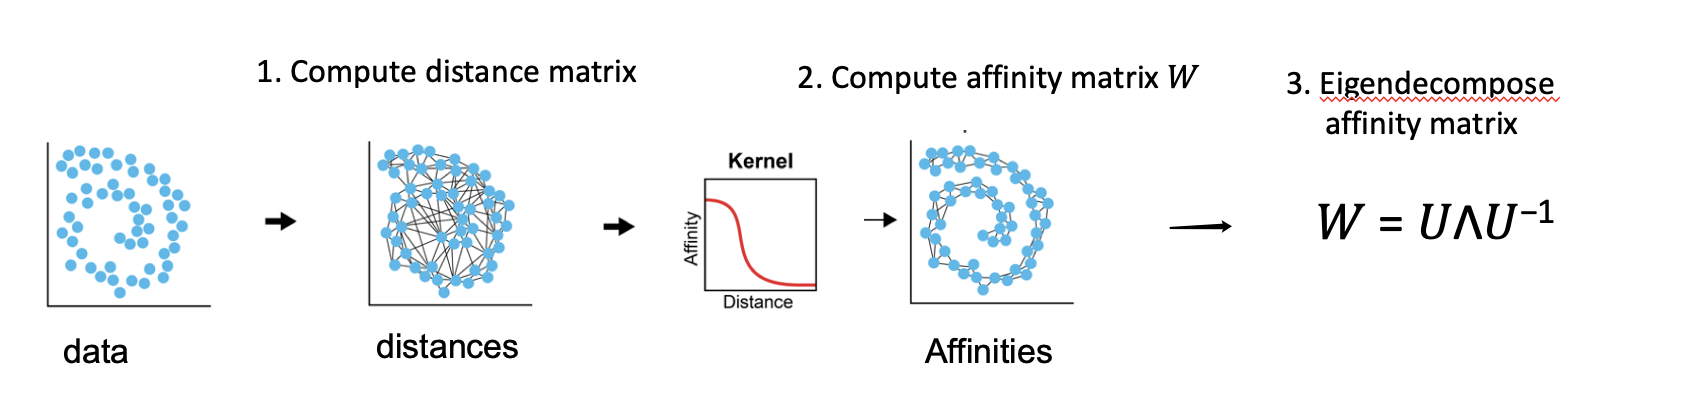

# kernel

## def of kernel

- in ML: a kernel $K: \mathcal{X} \times \mathcal{X}  \rightarrow \mathbb{R}$ is a function calculates similarity/affinity between any pair of inputs $\mathbf{x_i}, \mathbf{x_j} \in \mathcal{X}$

$$
\text{similarity} = K(\mathbf{x_i}, \mathbf{x_j})
$$

- in math, kernel is a weighting function for a weighted sum or integral.

## kernel trick: connect inner product to kernel

- a kernel $K: \mathcal{X} \times \mathcal{X}  \rightarrow \mathbb{R}$ is an inner product in another space $\mathcal{H}$

$$
K(\mathbf{x}, \mathbf{y})= \left \langle \varphi (x),\varphi (y) \right \rangle = \phi(x)^T\phi(y)
$$

$\varphi : \mathcal{X} \rightarrow \mathcal{H}$ is a feature map, an explicit representation fo $\varphi$ is not necessary, as long as $\mathcal{H}$ is an inner product space

$\mathcal{H}$ is **Hilbert space**, an unknown feature space where inner products are defined

## Mercer's Theorem: kernel matrix is PSD

- a kernel $K: \mathcal{X} \times \mathcal{X}  \rightarrow \mathbb{R}$ is a **symmetric** function such that

$$
K(\mathbf{x_i}, \mathbf{x_j}) = K(\mathbf{x_j}, \mathbf{x_i}) \text{ for all } x_i, x_j \in \mathcal{X}
$$

- simple case: choose measure to be counting, counts the number points inside set $T$, then the integral reduces to a summation

    kernel $K$ is **positive-semidefinite (PSD)** if and only if for all finite sequences of points $x_1, ..., x_n \in \mathcal{X} $ and all choices of coefficients $c_1, ..., c_n \in \mathbb{R}$

$$
\mu(T) = \sum _{i=1}^n \sum _{j=1}^n c_i c_j K(\mathbf{x_i}, \mathbf{x_j}) \geq 0
$$

- general case: $T_K$ is a linear operator (Hilbert integral operator) defined by integral of kernel multiplyes feature map over Hilbert space

$$
T_{K, \varphi}(\mathbf{x}) = \int_{\mathcal{H}} K(\mathbf{x}, \mathbf{s}) \varphi(\mathbf{s})d\mathbf{s}
$$

## type of kernel

- linear kernel: inner product of vectors $\mathbf{x}, \mathbf{y}$

$$
K(\mathbf{x}, \mathbf{y}) =\mathbf{x}^T \mathbf{y}
$$


- Gaussian kernel (RBF): when distance = 0, K = 1

$$
K(\mathbf{x}, \mathbf{y})=\exp \left(- \gamma \frac{\left \| \mathbf{x} - \mathbf{y} \right \|^2}{2} \right)
$$

where $\left \| \mathbf{x} - \mathbf{y} \right \|^2$ is square of Euclidean distance between $\mathbf{x}$ and $\mathbf{y}$

$\gamma = \frac{1}{\sigma^2}$ is inverse of variance of Gaussian $\sigma^2$, 

$\sigma$ is called bandwidth of kernel


- polynomial kernel: inner product is shifted by r, then powered by n 

$$
K(\mathbf{x}, \mathbf{y})=(\mathbf{x}^T \mathbf{y}+r)^n
$$

- k-nearest neighbors kernel

$$
K_{\text{knn}}(x_i, x_j) = \frac{1}{2} \left [ \exp\left ( -\frac{\left \| x_i - x_j \right \|^2}{\sigma_k(x_i)^2} \right ) +\exp\left ( -\frac{\left \| x_i - x_j \right \|^2}{\sigma_k(x_j)^2} \right ) \right ]
$$

where $\sigma_k(x_i)$ is the Euclidean distance from ith data point $x_i$ to its $k$ th nearest neighbor

For a fixed $k$, $\sigma_{knn}=\left \{ \sigma_1,..., \sigma_n \right \}$ are choices of adaptively bandwidth


# affinity matrix

- affinity matrix defines similarity between a set of vectors $\left \{ x_1, x_2,..,x_n \right \}$

- affinity matrix $A \in \mathbb{R}^{n \times n}$ is calculated by applying kernel function to pairwise distance matrix $D \in \mathbb{R}^{n \times n}$ of $n$ data points

$$
D=
\begin{bmatrix}
d(\mathbf{x_1}, \mathbf{x_1}) & \cdots  & d(\mathbf{x_1}, \mathbf{x_n})\\ 
 & \ddots  & \\ 
d(\mathbf{x_n}, \mathbf{x_1}) &  & d(\mathbf{x_n}, \mathbf{x_n})
\end{bmatrix}
$$

$$
A = 
\begin{bmatrix}
K(\mathbf{d_1}, \mathbf{d_1}) & \cdots  & K(\mathbf{d_1}, \mathbf{d_n})\\ 
 & \ddots  & \\ 
K(\mathbf{d_n}, \mathbf{d_1}) &  & K(\mathbf{d_n}, \mathbf{d_n})
\end{bmatrix}
$$

- affinity matrix gives a **graph representation** of data,

    each data point is a node/vertex, edge between data points is weighted by affinity

- **properties of affinity matrix: real-valued, positive semidefinite, symmetric**

# Mercer's theorem + Spectral theorem

- by Mercer's theorem, affinity matrix is PSD, we can treat it like any inner product matrix, which is symmetric positive semidefinite

- by Spectral theorem: a symmetric positive semidefinite is eigendecomposable and all eigenvalues are non-negative.

    thus, we can eigendecompose affinity matrix, **eigenvectors** are optimal data projection that preserve/maximize inner product

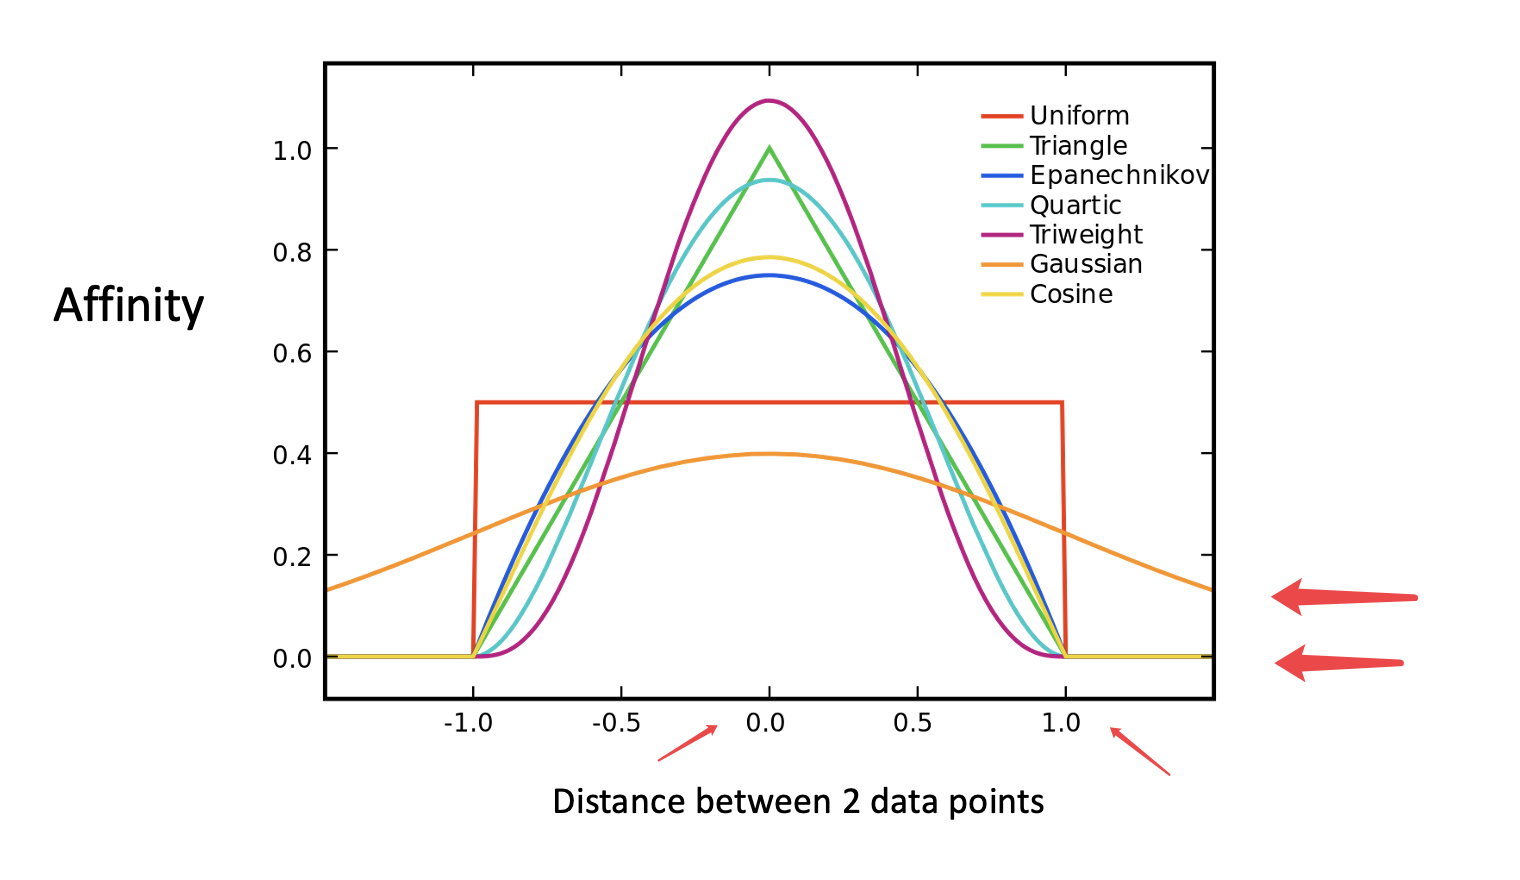

- the plot is Affinity vs. Distance between 2 data points

    - symmetric curve
    
    - when distance = 0, all the affinities reaches max, highest affinity
    
    - when distance -> 1, most affinities drop off in a non-linear way
    - when distance = 1, most affinities reaches 0 except Gaussian affinity is $\exp \left(-\frac{\gamma}{2}\right)$

# Swiss Roll Dataset

- a classic dataset for testing non-linear dim reduction algo

- the data is so coiled that hard to identify component if use linear dim reduction method to project data

- data also has a gradient of density, density decreases from inside to outside.

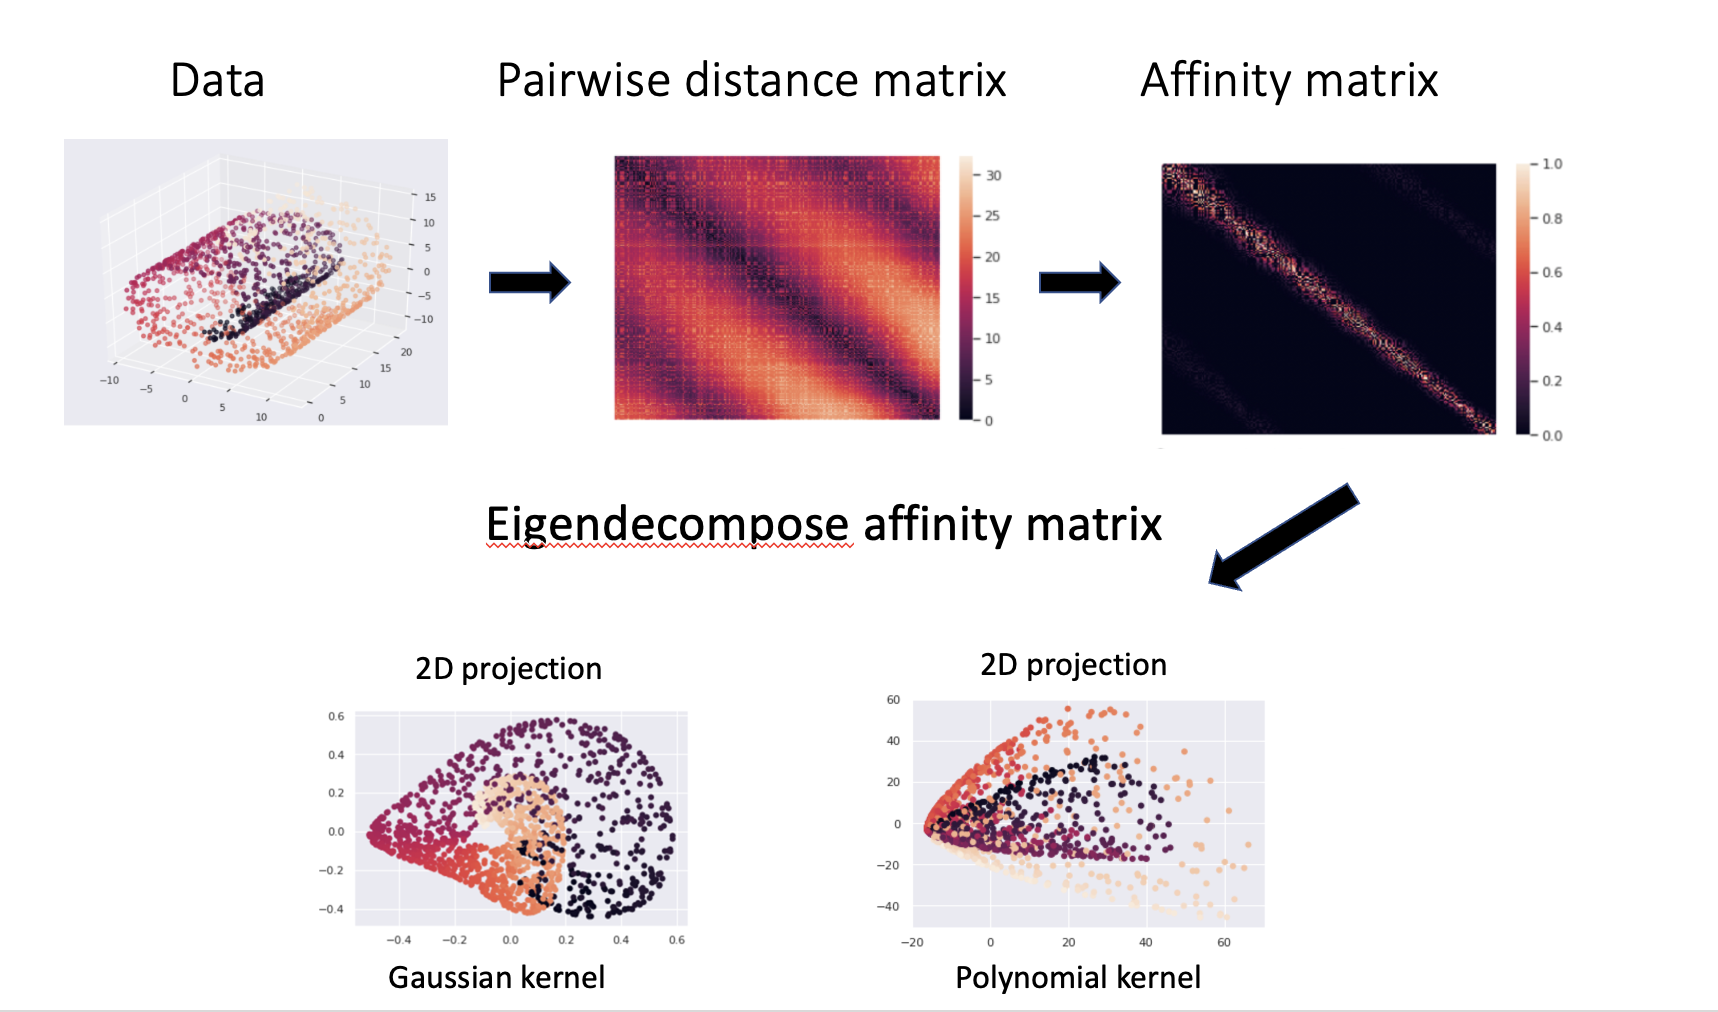

## compute pairwise distance matrix

- heatmap of distance matrix colored by distance

    the darker, the closer 2 points are
    
    - dark left diagonal: dense points near axis of roll in same layer
    
    - dark side bins: close points in two different layers of roll
    
    - light side bins: sparse points in same layer near outside of roll
    
    - alternative bands: same region of roll (sparse or dense), uneven distribution of pair points

## compute pairwise affinity matrix

- here we apply Gaussian kernel to distance matrix to get affinity matrix


- if we choose a suitable bandwidth $\sigma$,

    we can make dark side bins disappear, 
    
    only keep the left diagonal bin represent true close points,
    
    that's good for visualization in 2D,
    
    coz we find the **intrinsic shape** of data which keeps data **Manifold** distance

- bandwidth is a hyperparameter we should choose carefully,

    if we increase bandwidth, we will get distance matrix back coz affinity for **data points that aren't truly close to each other but also relatively close to each other** (在不同层但是距离很近，在同一个横截面） increase

## PCA vs. kernel PCA

- PCA: bad. keep coilness of data, distances in PCA projection are NOT intrinsic distances of data


- Gaussian kernel: better separate coiled area by spreading them out but still overlap


- polynomial kernel: we can see clusters but still overlap

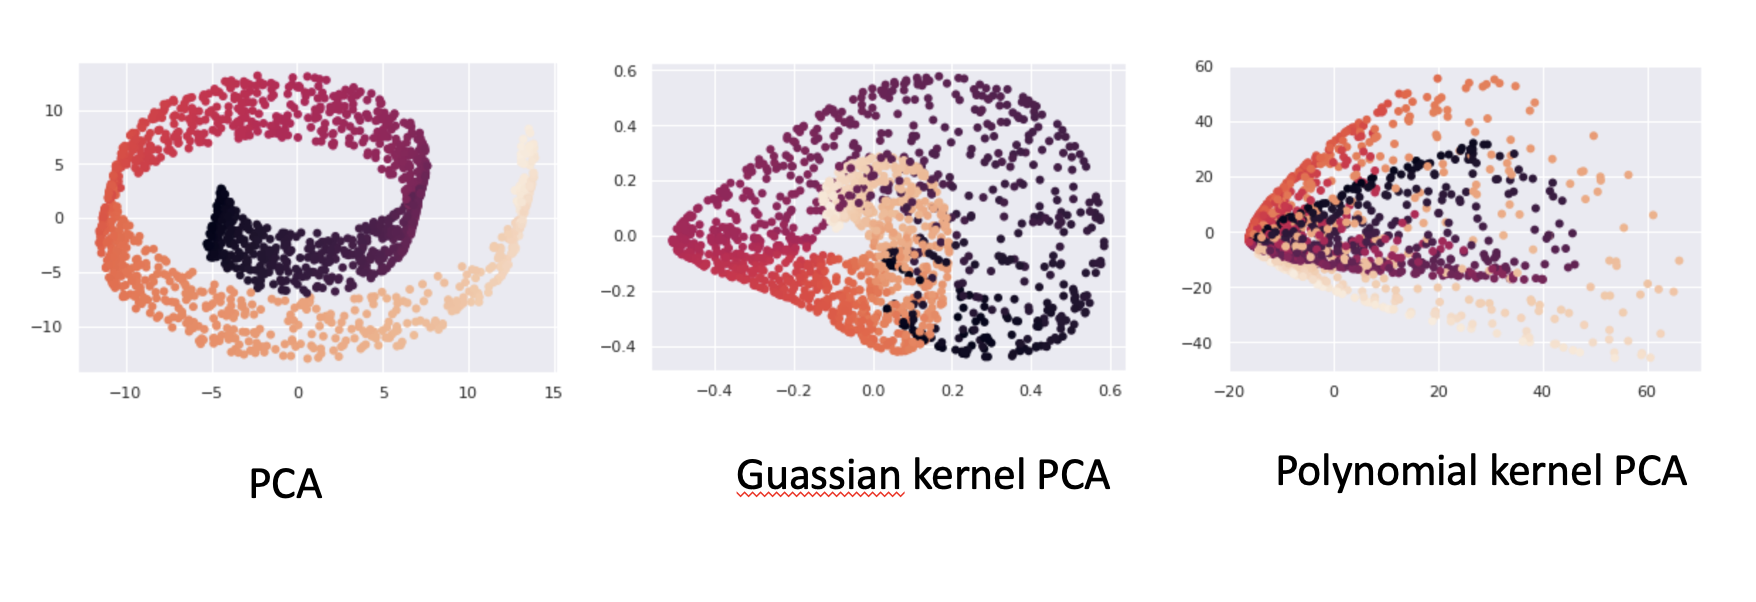

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
%matplotlib inline
from sklearn.decomposition import KernelPCA

Create the swiss roll dataset and compute kernel PCA

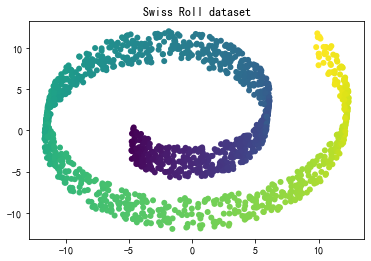

In [ ]:
data, color = sklearn.datasets.make_swiss_roll(n_samples=1500)
transformer = KernelPCA(n_components=2, kernel='linear', gamma=1/np.var(data))
data_transformed = transformer.fit_transform(data)
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=color, lw=0)
plt.title("Swiss Roll dataset")
plt.show()

## try different kernels with kernel PCA

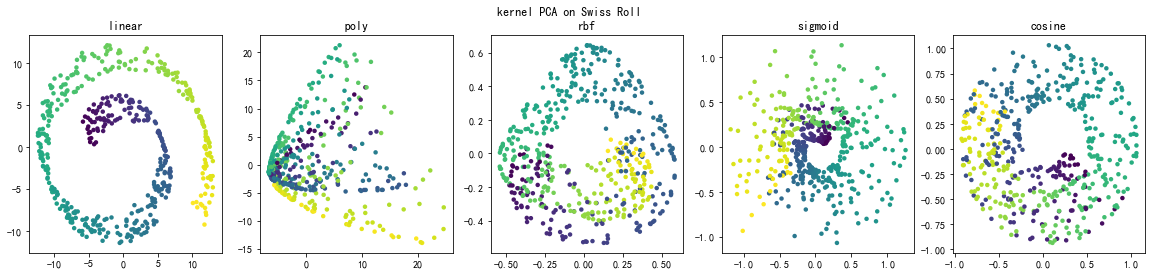

In [ ]:
fig, axes = plt.subplots(1,5,  figsize=(20,4))

kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']

for i, kernel in enumerate(kernels):
    
    transformer = KernelPCA(n_components=2, kernel=kernel, gamma=1/np.var(data))
    data_transformed = transformer.fit_transform(data)
    axes[i].scatter(data_transformed[:, 0], data_transformed[:, 1], s=20, c=color, lw=0)
    axes[i].set_title(kernel)

fig.suptitle("kernel PCA on Swiss Roll")
plt.show()

## different gamma with kernel PCA

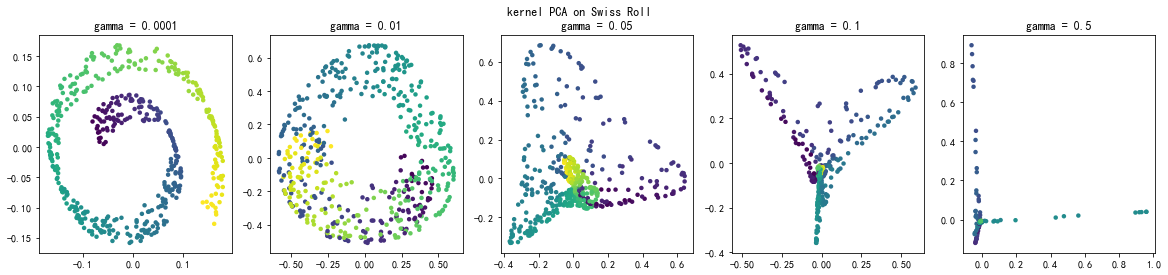

In [29]:
fig, axes = plt.subplots(1,5,  figsize=(20,4))

gammas = np.array([0.0001, 0.01, 0.05, 0.1, 0.5])

for i, gamma in enumerate(gammas):
    
    transformer = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    data_transformed = transformer.fit_transform(data)
    axes[i].scatter(data_transformed[:, 0], data_transformed[:, 1], s=20, c=color, lw=0)
    axes[i].set_title(f"gamma = {gamma}")

fig.suptitle("kernel PCA on Swiss Roll")
plt.show()

# 2 Moon dataset

- dataset: 2 moon shape clusters of red and green points, respectively

- PCA: 

    2D: give nearly same structure as original data
    
    1D: 2 moons overlap


- kernel PCA: 

    2D or 1D: separate 2 moons very well

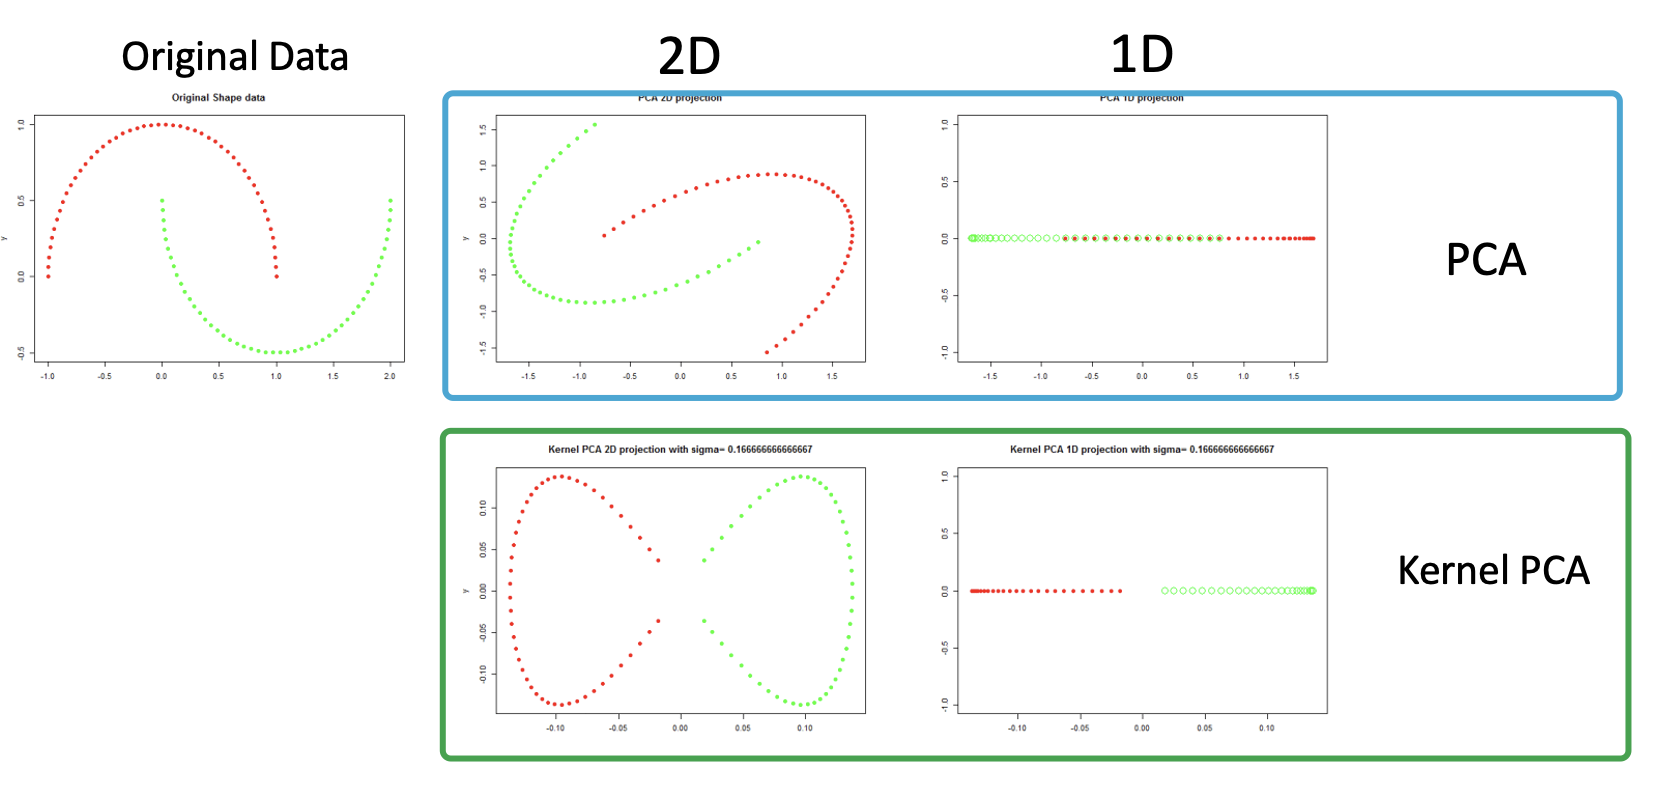